# Introduction

by Arvin Assanny

### Dataset Description

This data contains about information of the loan applications, which we obtain from [Kaggle.](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?datasetId=1532161&sortBy=voteCount)

Here we make explain our columns meaning.

Header | Definition
---|---
`ID` | Id of the user(All Unique)
`Income` | Income of the user
`Age  ` | Age of the user
`Experience` | Professional experience of the user in years
`Profession` | Profession of the user
`Married/Single` | Whether married or not
`House_Ownership` | Owned or rented or neither
`Car_Ownership` | Does the person own a car
`STATE` | State of residence
`CITY` | City of residence
`CURRENT_JOB_YRS` | Years of experience in the current job
`CURRENT_HOUSE_YRS` | Number of years in the current residence
`Risk_Flag` | Defaulted on a loan(Target variable)

### Objective

An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

### Problem Statement

We want to predict who are the possible Defaulters for our Loans Product, using Risk_Flag as our target variable.

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Data Preprocessing
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV

# Model Inference
import joblib

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For showing our time
import time

## Data Loading

In [2]:
df = pd.read_csv('Training Data.csv')
df.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [3]:
df.tail(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251990,251991,349066,68,4,single,rented,no,Technical_writer,Madhyamgram,West_Bengal,4,11,0
251991,251992,6828311,36,11,single,owned,no,Designer,Nagpur,Maharashtra,11,13,0
251992,251993,7551745,57,7,married,rented,no,Secretary,Nadiad,Gujarat,4,12,0
251993,251994,8141027,60,10,single,rented,no,Secretary,Bhusawal,Maharashtra,9,13,1
251994,251995,7215678,27,8,single,rented,no,Aviator,Satna,Madhya_Pradesh,8,10,0
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


Here we showed ten first and last row of our data set

### Check Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


We dont have any missing values, which is great because we don't need to handle it.

In [5]:
df.duplicated().sum()

0

We also don't have any duplicated data.

In [6]:
df.columns = map(str.lower, df.columns)
df.head(1)

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


Here we decided to lowercase all our columns title, in order to make it look tidy.

In [7]:
categorical = df.select_dtypes(["category", "object"]).columns

for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

married/single: 2 uniqueness variable
house_ownership: 3 uniqueness variable
car_ownership: 2 uniqueness variable
profession: 51 uniqueness variable
city: 317 uniqueness variable
state: 29 uniqueness variable


We see that our categorical column have some cardinality problems, we might want to handle it by drop some columns, since we don't have further data to generalize the labels.

In [8]:
numeric = df.select_dtypes(["int", "float"]).columns

for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

id: 252000 uniqueness variable
income: 41920 uniqueness variable
age: 59 uniqueness variable
experience: 21 uniqueness variable
current_job_yrs: 15 uniqueness variable
current_house_yrs: 5 uniqueness variable
risk_flag: 2 uniqueness variable


We also check our numerical data, it seems id column has no use in our model.

In [9]:
#checking other common missing values
miss = {}

for i in list(df.columns):
    miss[i] = 0
    for a in df[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'id': 0,
 'income': 0,
 'age': 0,
 'experience': 0,
 'married/single': 0,
 'house_ownership': 0,
 'car_ownership': 0,
 'profession': 0,
 'city': 0,
 'state': 0,
 'current_job_yrs': 0,
 'current_house_yrs': 0,
 'risk_flag': 0}

We want to make sure that our data is completely clean, and it turns out to be true.

### Check Unique Values

In [10]:
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

We have some ood labels here, we need to clean this.

In [11]:
df.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

On state column also.

In [12]:
df.profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

So many unique values on these columns, probably it is the best to drop this column. Because high cardinality may lead our model to be bias.

## Data Cleaning

In [13]:
df.city = df.city.str.extract("([A-Za-z]+)")
df.state = df.state.str.extract("([A-Za-z]+)")

Here we remove some odd labels on our data.

In [14]:
df.rename(columns={"married/single": "marry_status"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'marry_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

We also rename column to help us understand the data inside

## Exploratory Data Analysis


### Numerical and Categorical Central Tendency

In [15]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
current_job_yrs,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
current_house_yrs,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
risk_flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


From this data we can say we have 2 true numerical column and the rest may be a categorical.

In [16]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
marry_status,252000,2,single,226272
house_ownership,252000,3,rented,231898
car_ownership,252000,2,no,176000
profession,252000,51,Physician,5957
city,252000,316,Aurangabad,1543
state,252000,28,Uttar,29143


* Here we can see most people in our data is single.
* They also have a rented house rather than owned.
* Also, most aplicants do not have car.

### Target Variable Analysis

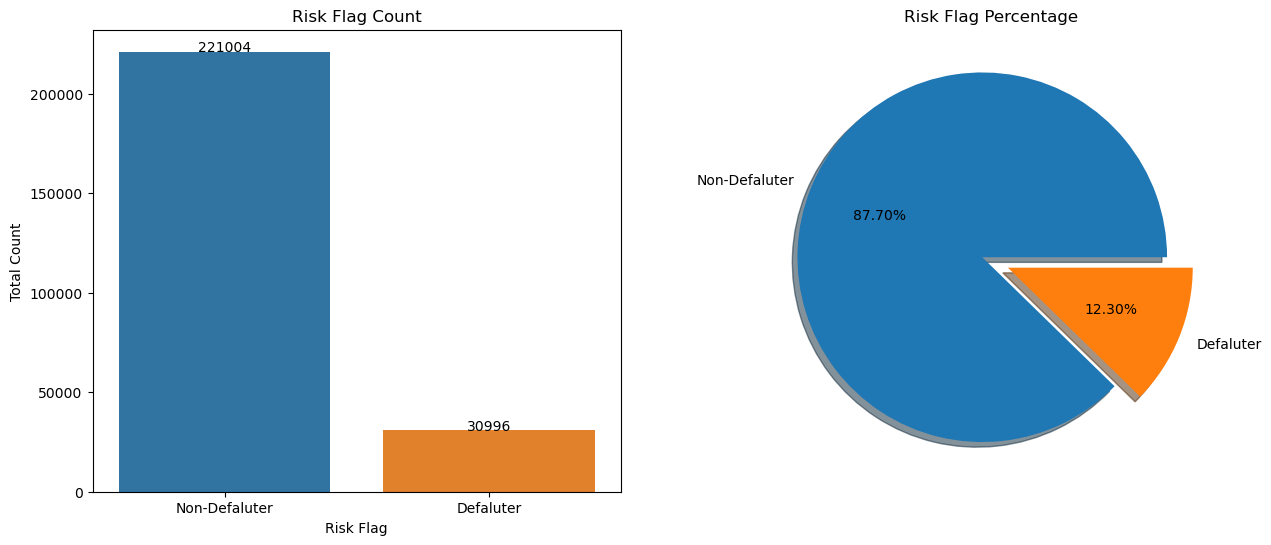

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='risk_flag', data=df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
plt.title('Risk Flag Count')
fig.set_xticklabels(['Non-Defaluter','Defaluter'])
plt.xlabel('Risk Flag')
plt.ylabel('Total Count')
plt.subplot(1, 2, 2)
plt.pie(df['risk_flag'].value_counts(), labels=['Non-Defaluter','Defaluter'], autopct='%1.2f%%', explode=[0.05, 0.1], shadow=True)
plt.title('Risk Flag Percentage')
plt.show()

our dataset is imbalanced, we may need to handle this problem to make our model good.

### Visualize Some Cateorical Column

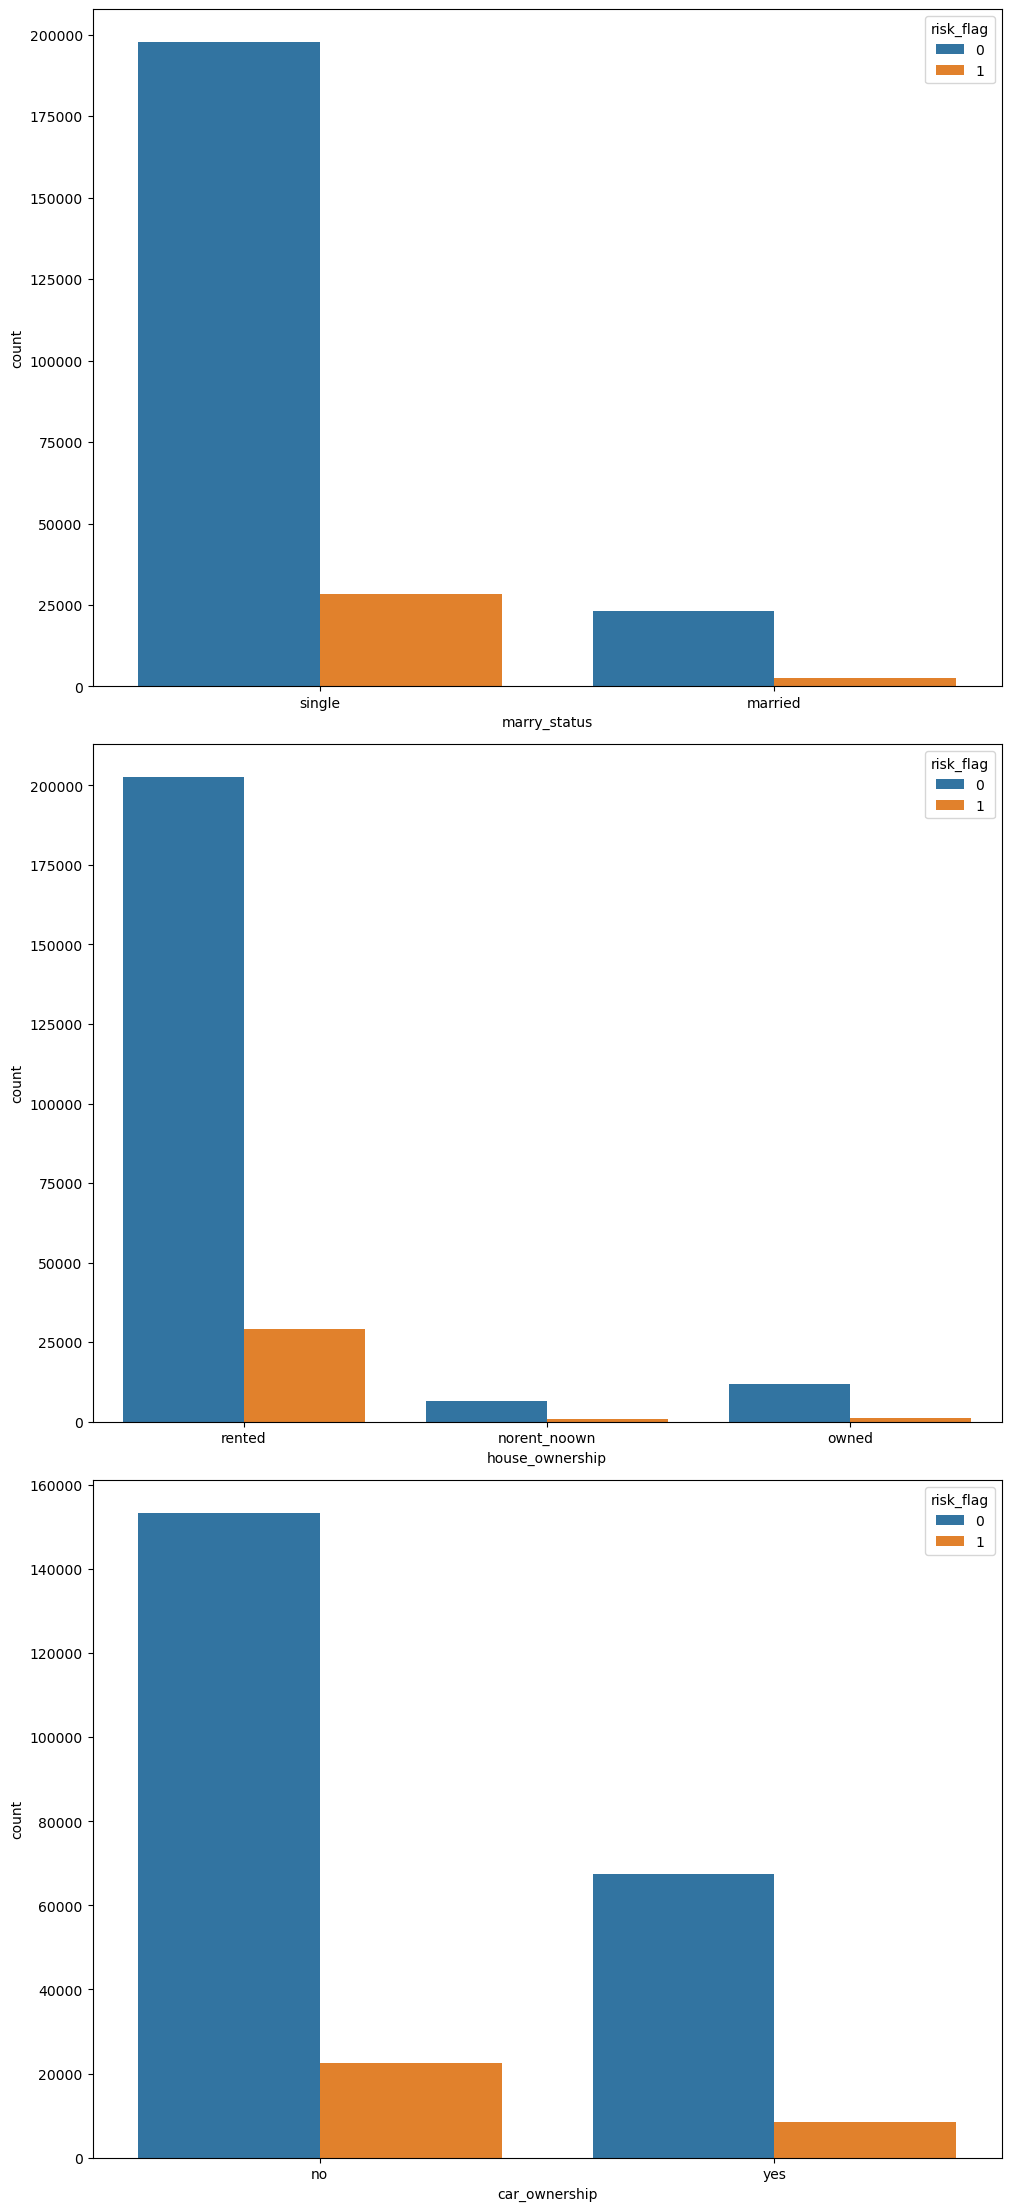

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,22), constrained_layout=True)
for index, column in enumerate(['marry_status', 'house_ownership', 'car_ownership']):
    sns.countplot(data=df, x=column, hue='risk_flag', ax=axes[index])
    
del fig, axes, index, column

Here we can see clearly about our categorical data. Insights we get from this chart are:
* Single applicants have a higher numbers of default.
* People without cars also have higher default.
* People with Rented house dominated our applicants, which also translate into more default.

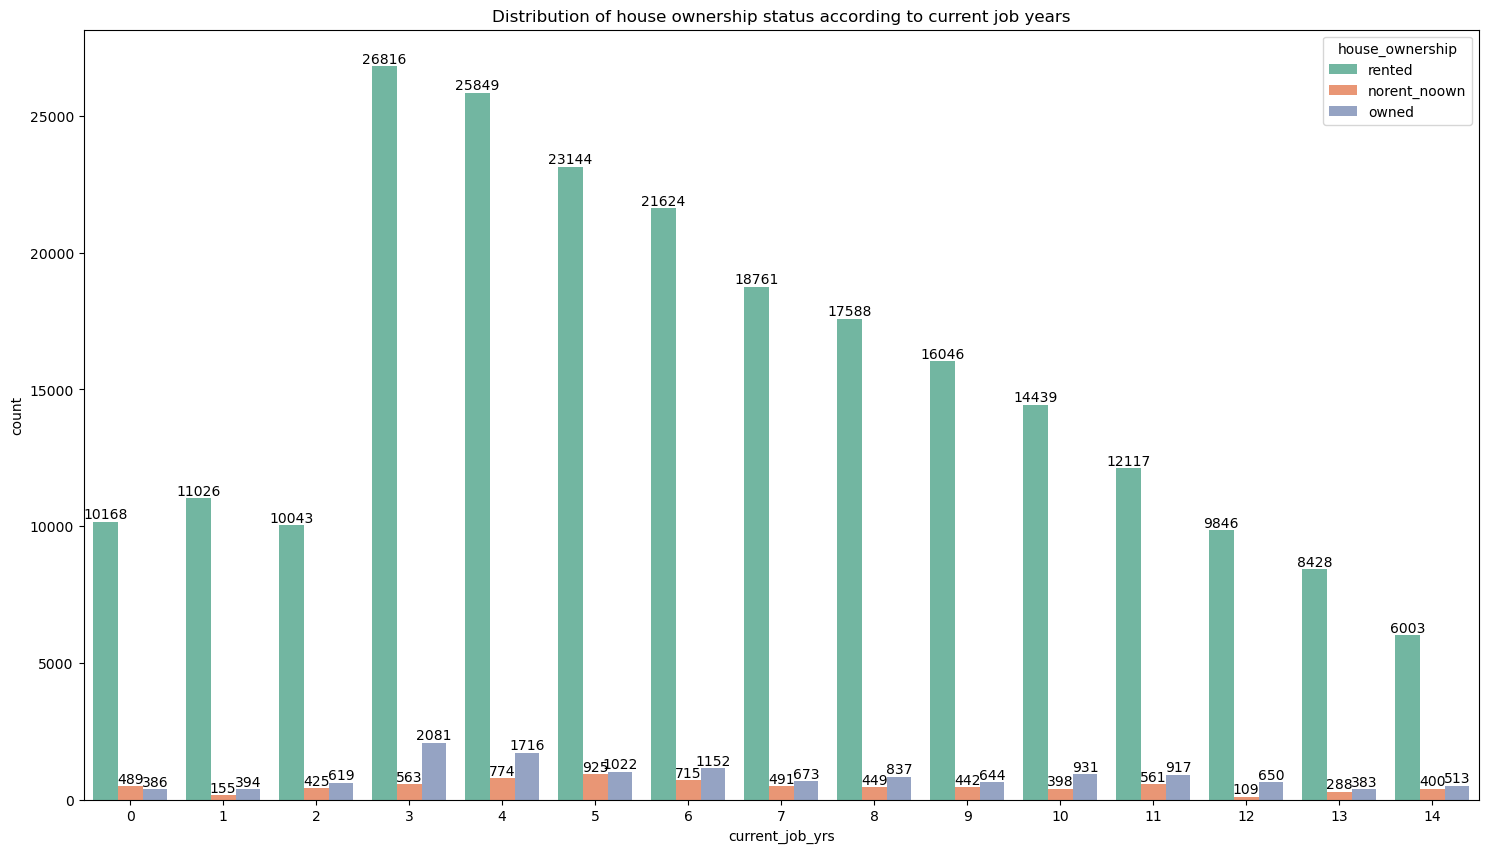

In [19]:
plt.figure(figsize=(18,10))
ax = sns.countplot(data = df , x=df["current_job_yrs"], hue= "house_ownership", palette="Set2")
plt.title('Distribution of house ownership status according to current job years')
for p in ax.containers:
    ax.bar_label(p)

Current job years doesn't give us a clear view, because we can not identify any relationship.

### Numerical Distribution

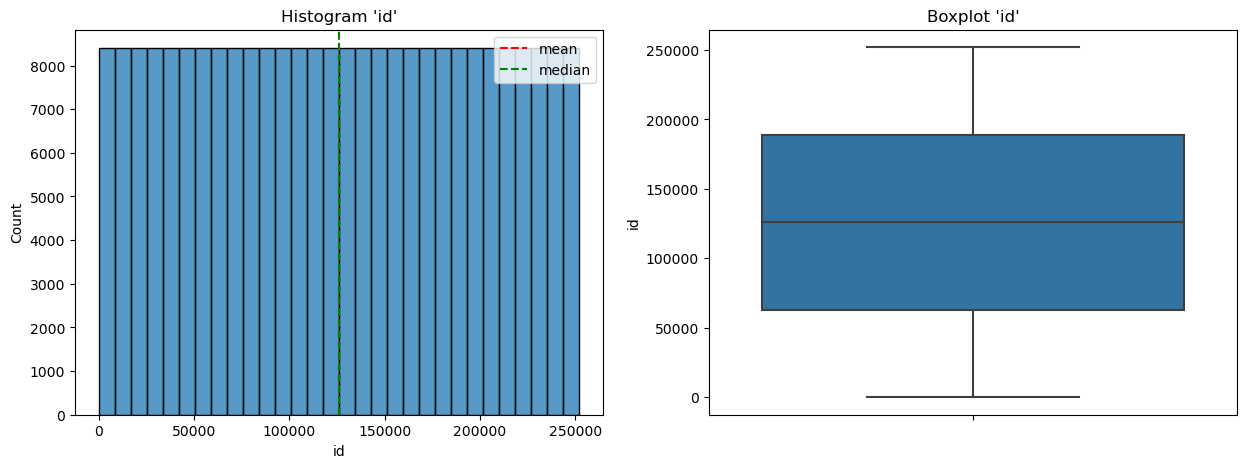

id Kurtosis: -1.2000000000000004
id Skewness: 0.0
Columns 'id' Normal Distribution


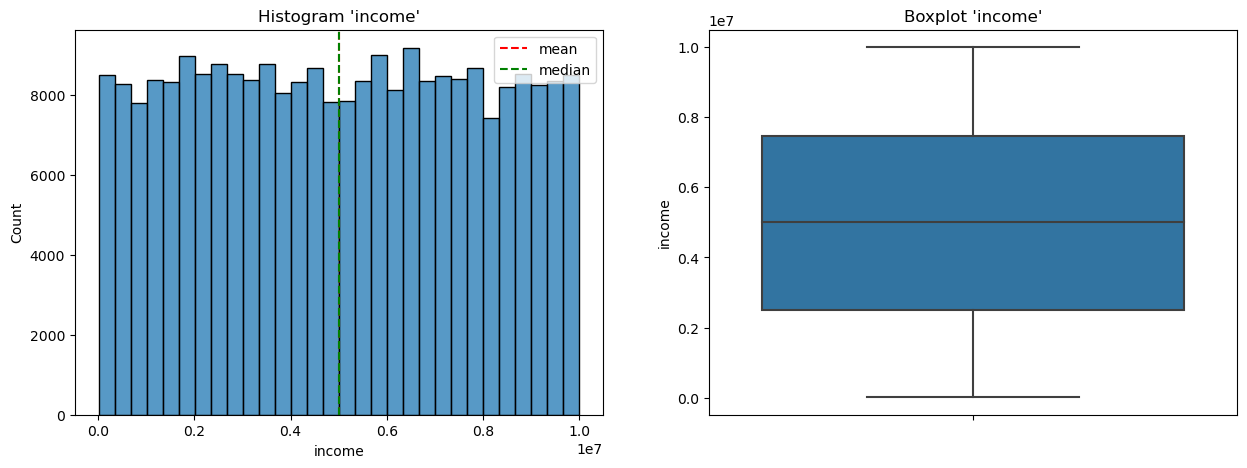

income Kurtosis: -1.1986385403127735
income Skewness: 0.005957563400969881
Columns 'income' Normal Distribution


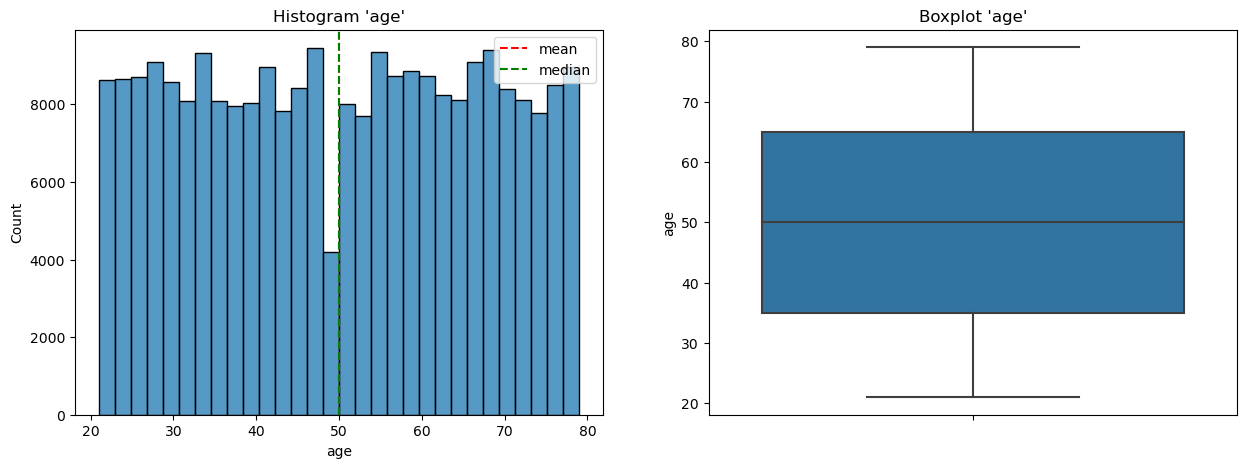

age Kurtosis: -1.2047686664238493
age Skewness: -0.005315595764466954
Columns 'age' Normal Distribution


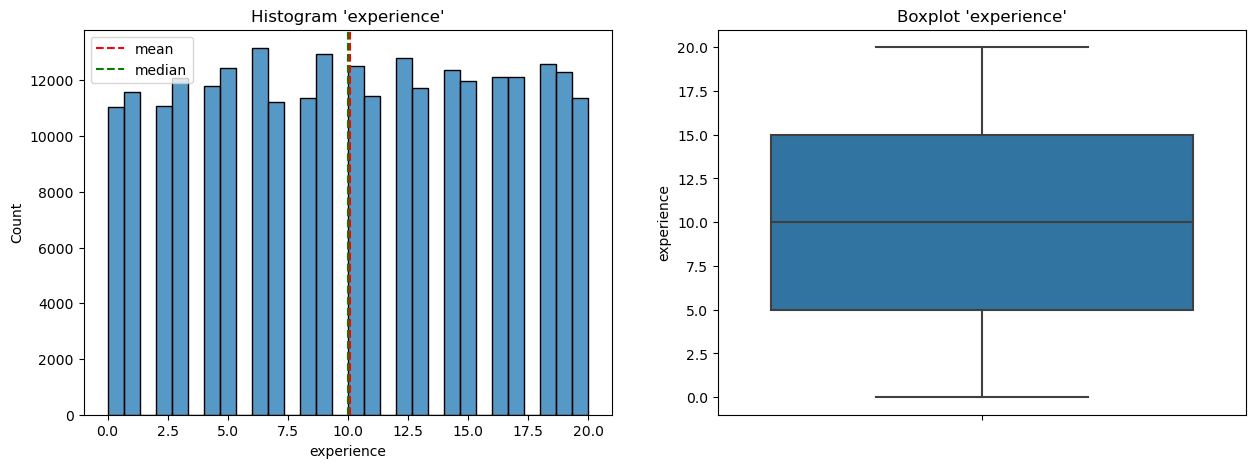

experience Kurtosis: -1.194938635806047
experience Skewness: -0.012779027346924958
Columns 'experience' Normal Distribution


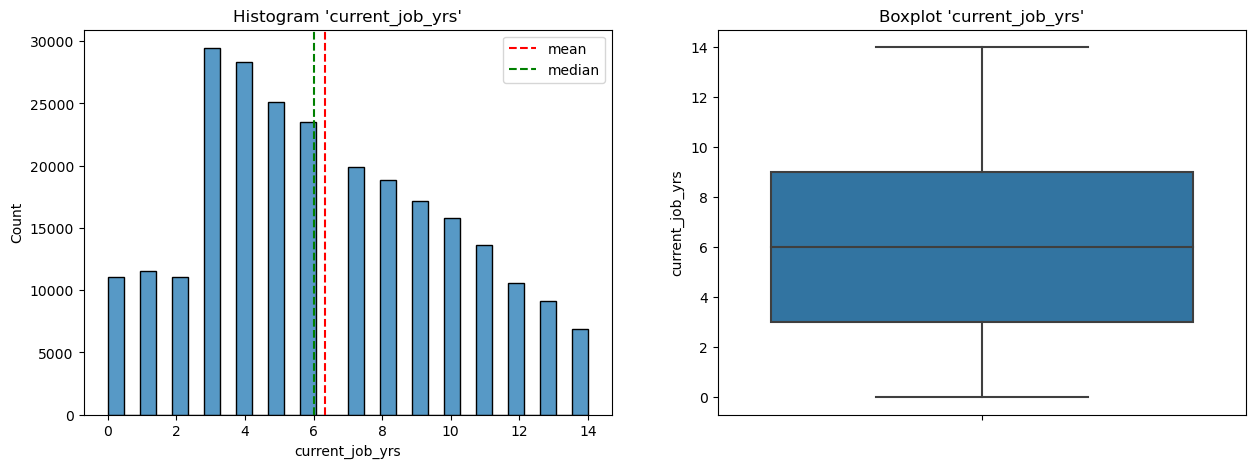

current_job_yrs Kurtosis: -0.785973236015097
current_job_yrs Skewness: 0.2731459574239138
Columns 'current_job_yrs' Normal Distribution


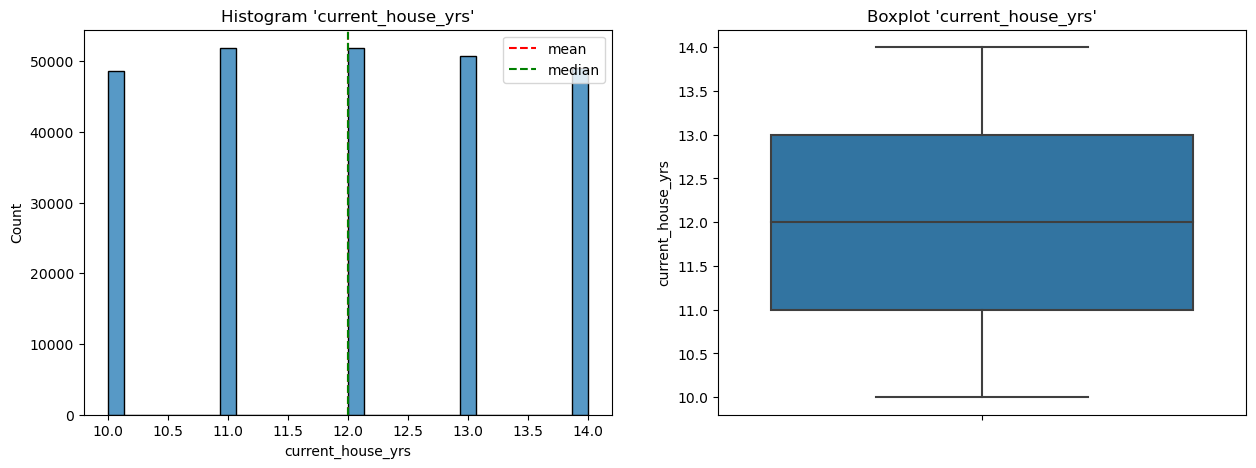

current_house_yrs Kurtosis: -1.2749489921203807
current_house_yrs Skewness: 0.006786099240688336
Columns 'current_house_yrs' Normal Distribution


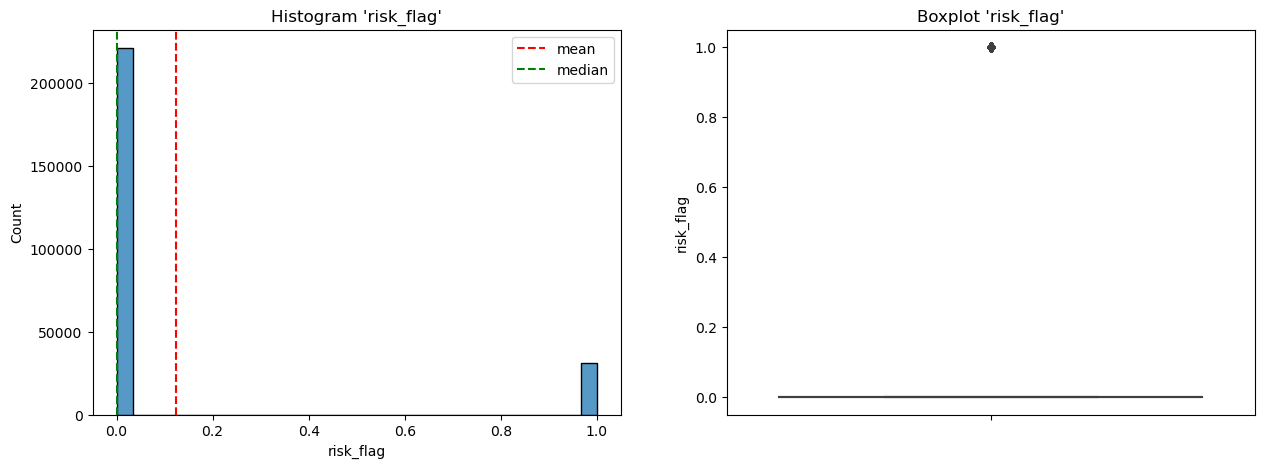

risk_flag Kurtosis: 3.2704208543726505
risk_flag Skewness: 2.295734065329557
Columns 'risk_flag' Right Highly Skewed


In [20]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = df[numeric]

for col in dnum.columns:
    dist(df[numeric], col)

We have many numerical with categorical-like data, but the good news is that we don't need to handle outliers and also our distribution data is already Gaussian.

### Check Correlation

In [21]:
# We use phik correlation
phik_corr = df.phik_matrix().risk_flag
phik_corr.sort_values(ascending=False)

interval columns not set, guessing: ['id', 'income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs', 'risk_flag']


risk_flag            1.000000
city                 0.175016
id                   0.155840
state                0.066660
experience           0.058546
current_job_yrs      0.058443
profession           0.057001
age                  0.042945
car_ownership        0.037596
marry_status         0.032944
income               0.029650
house_ownership      0.016138
current_house_yrs    0.002367
Name: risk_flag, dtype: float64

id and city has a high correlation, but we might need to drop these column since the id column has no use and city has too many unique values

## Feature Enginering

We want to prepare and modify our data to fit it into our models.

### Feature Selection

* We want to drop id, city, profession, state because it has too many unique value.
* We will keep other features because from my personal judgement the rest of the features are also important, to determine whether if a person may be a defaulter or not. 
* Now we will go ahead to split our data and its columns name to help us in our model training.

In [22]:
feature = ['income', 'age', 'experience', 'marry_status', 'house_ownership',
       'car_ownership', 'current_job_yrs','current_house_yrs']
target = ['risk_flag']

In [23]:
# Feature and target split
X = df[feature]
y = df[target]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=41)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (189000, 8)
Test Size  :  (63000, 8)


Now we split into 4 data, also we use stratify to make sure the split between train set and test set each have equal propotion as the original y.

In [25]:
num_cols = X[['income', 'age']].columns.tolist()
cat_cols = X[['experience', 'marry_status', 'house_ownership',
       'car_ownership', 'current_job_yrs','current_house_yrs']].columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')


X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 2
Numerical columns: ['income', 'age']
Number of categorical columns: 6
Categorical columns: ['experience', 'marry_status', 'house_ownership', 'car_ownership', 'current_job_yrs', 'current_house_yrs']


we have splited our data.

## Pipeline

We will use pipeline in our preprocessing. This steps will include scaling our numerical data and encode our categorical data. We use StandardScaler because our data have normal distribution, and we use Ordinal encoder to encode our data, since we have some ordered categorical data.

In [26]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(pd.DataFrame(X_train[num_cols]))
num_tr

array([[ 0.37127166,  0.70795189],
       [ 1.54177429, -0.34709488],
       [ 1.05928296, -1.6952102 ],
       ...,
       [-1.69068081,  0.64933818],
       [-1.4105972 , -0.58154972],
       [ 1.55034262, -0.87461827]])

In [27]:
cat_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder())
    ])

cat_tr = cat_pipeline.fit_transform(X_train[cat_cols])
cat_tr

array([[14.,  0.,  2.,  0., 10.,  0.],
       [ 0.,  1.,  2.,  1.,  0.,  0.],
       [ 6.,  0.,  2.,  1.,  4.,  1.],
       ...,
       [17.,  1.,  2.,  1., 14.,  1.],
       [11.,  0.,  2.,  0.,  3.,  0.],
       [10.,  1.,  2.,  0., 10.,  3.]])

In [28]:
# Preprocessing pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat_ord", cat_pipeline, cat_cols),
    ])

train_tr = preprocessing.fit_transform(X_train)
train_tr

array([[ 0.37127166,  0.70795189, 14.        , ...,  0.        ,
        10.        ,  0.        ],
       [ 1.54177429, -0.34709488,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05928296, -1.6952102 ,  6.        , ...,  1.        ,
         4.        ,  1.        ],
       ...,
       [-1.69068081,  0.64933818, 17.        , ...,  1.        ,
        14.        ,  1.        ],
       [-1.4105972 , -0.58154972, 11.        , ...,  0.        ,
         3.        ,  0.        ],
       [ 1.55034262, -0.87461827, 10.        , ...,  0.        ,
        10.        ,  3.        ]])

In [29]:
# convert array into dataframe
train_tr_df = pd.DataFrame(train_tr, columns=feature)
train_tr_df

,income,age,experience,marry_status,house_ownership,car_ownership,current_job_yrs,current_house_yrs
0,0.371272,0.707952,14.0,0.0,2.0,0.0,10.0,0.0
1,1.541774,-0.347095,0.0,1.0,2.0,1.0,0.0,0.0
2,1.059283,-1.695210,6.0,0.0,2.0,1.0,4.0,1.0
3,0.997764,-1.402142,18.0,1.0,2.0,0.0,3.0,3.0
4,0.371774,-1.460755,20.0,1.0,2.0,0.0,5.0,2.0
...,...,...,...,...,...,...,...,...
188995,0.117891,1.704385,4.0,1.0,2.0,1.0,4.0,3.0
188996,-1.732591,-1.577983,1.0,1.0,2.0,1.0,1.0,4.0
188997,-1.690681,0.649338,17.0,1.0,2.0,1.0,14.0,1.0
188998,-1.410597,-0.581550,11.0,0.0,2.0,0.0,3.0,0.0


We also use pipeline on our test set.

In [30]:
test_tr = preprocessing.transform(X_test)
test_tr

array([[ 0.60903459,  1.00102044, 17.        , ...,  0.        ,
         5.        ,  0.        ],
       [-0.95097351, -0.4643223 ,  2.        , ...,  0.        ,
         2.        ,  0.        ],
       [ 1.50106309,  0.06320109, 20.        , ...,  0.        ,
         7.        ,  0.        ],
       ...,
       [ 0.6410315 , -0.58154972, 19.        , ...,  1.        ,
         9.        ,  2.        ],
       [-0.69153918,  0.53211076, 18.        , ...,  0.        ,
         6.        ,  0.        ],
       [ 0.15731821, -0.64016343,  1.        , ...,  0.        ,
         1.        ,  3.        ]])

In [31]:
# convert array into dataframe
test_tr_df = pd.DataFrame(test_tr, columns=feature)
test_tr_df

,income,age,experience,marry_status,house_ownership,car_ownership,current_job_yrs,current_house_yrs
0,0.609035,1.001020,17.0,1.0,2.0,0.0,5.0,0.0
1,-0.950974,-0.464322,2.0,1.0,2.0,0.0,2.0,0.0
2,1.501063,0.063201,20.0,0.0,2.0,0.0,7.0,0.0
3,-1.728713,-1.402142,14.0,1.0,2.0,1.0,5.0,0.0
4,0.664247,0.297656,5.0,1.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
62995,1.257941,1.001020,18.0,1.0,2.0,1.0,11.0,4.0
62996,1.390420,1.469930,12.0,1.0,2.0,0.0,12.0,3.0
62997,0.641031,-0.581550,19.0,1.0,2.0,1.0,9.0,2.0
62998,-0.691539,0.532111,18.0,1.0,2.0,0.0,6.0,0.0


here we have our train and test set ready for training.

### Checking VIF

Now we have a encoded categorical data frame to numerical, we can calculate the VIF(Variance Inflation Factor), which is a measure if a column may contains the same information with another column.

Here we don't use a  encoded data because it may not be good to use.

In [32]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(train_tr_df[['income', 'age']])

,variables,VIF
0,income,1.000001
1,age,1.000001


We have a low vif number, which is good. Now onto the next step.

### Handling Imbalanced Target

we do this by oversampling the minority class, the models will be able to detect better and predict the minority class.

In [34]:
y_train.value_counts()

risk_flag
0            165753
1             23247
dtype: int64

Here our target data is imbalanced.

In [35]:
over = SMOTE(random_state=21, sampling_strategy='minority')
train_tr_df, y_train_over = over.fit_resample(train_tr_df,y_train)

In [36]:
y_train_over.value_counts()

risk_flag
0            165753
1            165753
dtype: int64

* Due to the use of synthetic data, we cannot evaluate the models using accuracy. We have duplicated the data, thus using accuracy would be misleading to evaluate the model.

* We will use the confusion matrix, and using recall score

## Model Definition
We will define our base model here, after that we will do cross validation to choose the best model for our case.

In [37]:
#Defining Decision Tree and assigning to a variable
dt = DecisionTreeClassifier(random_state=7)
#Defining Random Forest and assigning to a variable
rf = RandomForestClassifier(random_state=7)
#Defining Gaussian Naive Bayes and assigning to a variable
nb = GaussianNB()
#Defining boosting Classifier and assigning to a variable
xgb = XGBClassifier(random_state=7)

## Cross Validation
We use cross-validation to evaluate our models which is a way to check how well our models generalize to a new unseen data.

We also use `StratifiedKFold ` because our data is imbalanced. Using this variation can ensure that the target variable distribution is approximately the same across all the folds of the cross-validation. Also after using SMOTE, adding `StratifiedKFold ` may help to ensure that the minority class is represented in each fold of the cross-validation process, and to prevent overfitting due to oversampling.

In [38]:
# Define Skfold using StratifiedKFold
skfold=StratifiedKFold(n_splits=3, random_state=7, shuffle=True)

# checking cross validation score
cv_dt_model = cross_val_score(dt, train_tr_df, y_train_over, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf, train_tr_df, y_train_over, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb, train_tr_df, y_train_over, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(xgb, train_tr_df, y_train_over, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_dt_model,cv_rf_model,cv_nb_model,cv_xgb_model],['dt_model','rf_model','nb_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

dt_model
recall - All - Cross Validation  :  [0.94930408 0.95169318 0.95037194]
recall - Mean - Cross Validation :  0.9504564019957407
recall - Std - Cross Validation  :  0.0009771716521679037
recall - Range of Test-Set       :  0.9494792303435727 - 0.9514335736479086
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.96919513 0.96999149 0.97082406]
recall - Mean - Cross Validation :  0.9700035595132518
recall - Std - Cross Validation  :  0.0006650625342296322
recall - Range of Test-Set       :  0.9693384969790222 - 0.9706686220474814
--------------------------------------------------
nb_model
recall - All - Cross Validation  :  [0.81486308 0.81424771 0.81406671]
recall - Mean - Cross Validation :  0.8143924996832635
recall - Std - Cross Validation  :  0.000340855294126211
recall - Range of Test-Set       :  0.8140516443891374 - 0.8147333549773897
--------------------------------------------------
xgb_model
recall - All - Cross Validation

We see that our Random Forest is the best model. Now we want to evaluate the baseline model of random forest.

## Model Training

Now we will start our data training and also calculating the computational time of our data training 

In [39]:
start = time.time()
rf.fit(train_tr_df, y_train_over)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 41.93245720863342 sec


The training time is quite fast considering the size of our data.

## Model Evaluation
In this section we'll evaluate our trained model and finding out the scores from our model in predicting the default in our loan product.

First we're going to predict our trained model to predict the train and tests data :

In [40]:
rf_pred_train = rf.predict(train_tr_df)
rf_pred_test = rf.predict(test_tr_df)

We use classification report in order to evaluate our model in predicting our train and test data. This is because it can provide several evaluation metrics that can help to understand the model's performance.


In [41]:
target_names = ['Non-Defaulters', 'Defaulters']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train_over,rf_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_pred_test,zero_division=0, target_names = target_names))

======================================== TRAINING ========================================
                precision    recall  f1-score   support

Non-Defaulters       1.00      0.92      0.96    165753
    Defaulters       0.92      1.00      0.96    165753

      accuracy                           0.96    331506
     macro avg       0.96      0.96      0.96    331506
  weighted avg       0.96      0.96      0.96    331506

======================================== TEST ========================================
                precision    recall  f1-score   support

Non-Defaulters       0.97      0.90      0.93     55251
    Defaulters       0.52      0.80      0.63      7749

      accuracy                           0.89     63000
     macro avg       0.75      0.85      0.78     63000
  weighted avg       0.92      0.89      0.90     63000



From this result we want to set our false and true class.
So after finding our the definitions, we are going to focus on the default class because it's our main objective in predicting the risky people or defaulters. If we put it in the concepts of True Positive, True Negative, False Positive, and False Negative, we could intepret as follows :

Positive Class : Default

Negative Class : Not Default

* True Positive : the classifier predicts default, in reality it is default

* True Negative : the classifier predicts not default, in reality it is no default

* False Positive : the classifier predicts default, in reality it is not defaulted

* False Negative : the classifier predicts not default, in reality it is defaulted

From the above concept, we want to focus on reducing on our False Negatives, since our False negative states the classifier predicts not default, in reality it is defaulted, so we're going to focus on the recall in our default class. We don't want our classifier to predict a people not default meanwhile in the reality they are (default).

From our intial model we can say that:
* We see that our model is overfitting, with the train data score is higher by some distance.
* The overfitting in our result may be caused by it failure to generalize a new data.
* Our test set recall result is 0.80 which is a decent score from my assumption, because the model will predicted 80% of the identified default correctly.

Now we want to look at test Confusion matrix, which may help us to understand the total of false negative and true negative.

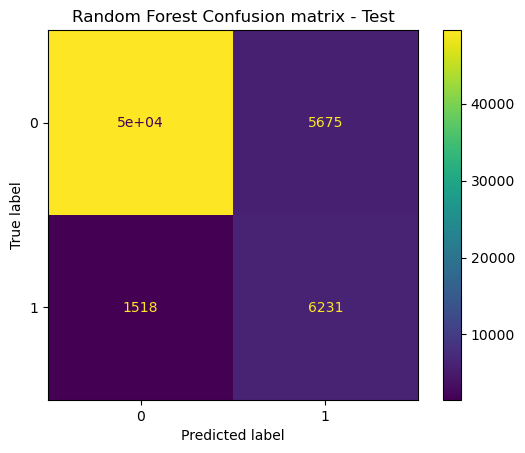

In [42]:
# Display Random Forest Confusion matrix - Test

cm_rf_test = confusion_matrix(y_test, rf_pred_test, labels=rf.classes_)
disp_rf_test = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test,display_labels=rf.classes_)

disp_rf_test.plot()
plt.title('Random Forest Confusion matrix - Test')
plt.show()

* From Confussion matrix of test predict, we see that with our model we predict 1518 False Negative
* From Confussion matrix of test predict, we see that with our model we predict 6231 True Positive

Here we can say that almost 80% percent of our data that should be predictied positive were mis-predicted as False negative, which is a good result.

### Hyperparameter Tuning

Now we want to tune our second model to try get better result.

In [43]:
hyperparameters = {
    'n_estimators': np.arange(50,100,50),
    'max_depth': np.arange(5,10,5),
    'min_samples_split': np.arange(2, 4, 2),
}

rf_grid = RandomizedSearchCV(rf, hyperparameters, scoring='recall', n_iter=50, cv=3, n_jobs=2, return_train_score=True)
rf_grid.fit(train_tr_df, y_train_over)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
                   n_iter=50, n_jobs=2,
                   param_distributions={'max_depth': array([5]),
                                        'min_samples_split': array([2]),
                                        'n_estimators': array([50])},
                   return_train_score=True, scoring='recall')

Here we use RandomizedSearchCV because of our hardware limitations in handling the size of the dataset we have.

In [44]:
rf_grid.best_params_

{'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 5}

In [45]:
rf_grid.best_score_

0.6114881781928533

In [46]:
rf_df = pd.DataFrame(rf_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
rf_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False) 

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
0,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.611488,0.064838,0.613512,0.04903


Our result may be worse than baseline model, we will look into it later.

In [47]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=7)

In [48]:
rf_tuned = rf_grid.best_estimator_

Here we assigned our tuned model into new variable. Now we want to train this model, the evaluates it.

### Model Training & Evaluation After Tuning

Now we will use the tuned model and evaluate it, also compare the model before tuning and after tuning.

In [49]:
start = time.time()
rf_tuned.fit(train_tr_df, y_train_over)
end = time.time()

print(f'Training Duration : {end-start} sec')

Training Duration : 8.896753311157227 sec


The training is super fast compared to base model.

In [50]:
rf_tuned_pred_train = rf_tuned.predict(train_tr_df)
rf_tuned_pred_test = rf_tuned.predict(test_tr_df)

Here we predict our model, and after that we evaluate it the same way we did previously.

In [51]:
print('Before Tuning : ')
target_names = ['Non-Defaulters', 'Defaulters']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train_over,rf_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_pred_test,zero_division=0, target_names = target_names))
print('After Tuning : ')
target_names = ['Non-Defaulters', 'Defaulters']
print("=="*20,"TRAINING","=="*20)
print(classification_report(y_train_over,rf_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,rf_tuned_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
======================================== TRAINING ========================================
                precision    recall  f1-score   support

Non-Defaulters       1.00      0.92      0.96    165753
    Defaulters       0.92      1.00      0.96    165753

      accuracy                           0.96    331506
     macro avg       0.96      0.96      0.96    331506
  weighted avg       0.96      0.96      0.96    331506

======================================== TEST ========================================
                precision    recall  f1-score   support

Non-Defaulters       0.97      0.90      0.93     55251
    Defaulters       0.52      0.80      0.63      7749

      accuracy                           0.89     63000
     macro avg       0.75      0.85      0.78     63000
  weighted avg       0.92      0.89      0.90     63000

After Tuning : 
======================================== TRAINING ========================================
                prec

Our result after tuning do not look good, we see here that after tuning our recall score on test set are decrease into 0.64 from 0.80. For this reason we will not use this model in our inference data. 

Next we will show the Confusion matrix from tuned model.

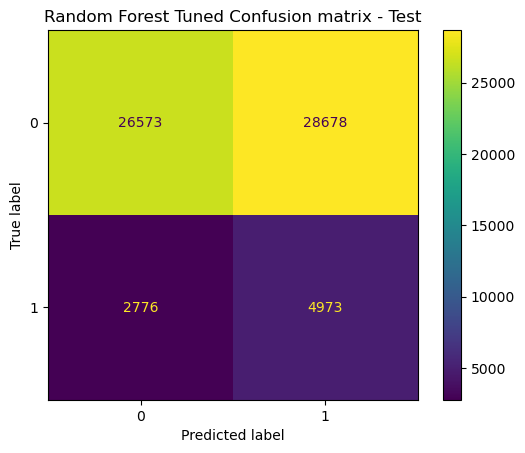

In [52]:
# Display Random Forest Confusion matrix - Test

cm_rf_tuned_test = confusion_matrix(y_test, rf_tuned_pred_test, labels=rf.classes_)
disp_rf_tuned_test = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned_test,display_labels=rf.classes_)

disp_rf_tuned_test.plot()
plt.title('Random Forest Tuned Confusion matrix - Test')
plt.show()

* From Confussion matrix of test predict, we see that with our model we predict 2276 False Negative
* From Confussion matrix of test predict, we see that with our model we predict 4974 True Positive

Here we can say that almost 65% percent of our data that should be predictied positive were mis-predicted as False negative, which is not a good result compared to what we already have.

## Pipeline Final

Here we want to build our pipeline, which will help us in Inferece data and deployment. We will test whether to include SMOTE or not by testing the pipeline.

### Without SMOTE

In [53]:
all_process = Pipeline([
    ("preprocessing", preprocessing),
    ("rf_model", rf)
])

In [54]:
all_process.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['income', 'age']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['experience', 'marry_status',
                                                   'house_ownership',
                                                   'car_ownership',
                                                   'current_job_yrs',
                                                   'current_house_yrs'])])),
                ('rf_model', RandomForestClassifier(random_state=7))])

In [55]:
pipe_train = all_process.predict(X_train)
pipe_test = all_process.predict(X_test)


In [56]:
target_names = ['Non-Defaulters', 'Defaulters']
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,pipe_test,zero_division=0, target_names = target_names))

======================================== TEST ========================================
                precision    recall  f1-score   support

Non-Defaulters       0.94      0.95      0.94     55251
    Defaulters       0.60      0.54      0.57      7749

      accuracy                           0.90     63000
     macro avg       0.77      0.74      0.76     63000
  weighted avg       0.89      0.90      0.90     63000



Here we see a drop recall score when the pipeline does not include smote.

### Include SMOTE

In [57]:
# Use pipeline from imblearn
all_process_imb = imbpipe([
    ("preprocessing", preprocessing),
    ("over_sample", SMOTE(random_state=21, sampling_strategy='minority')),
    ("rf_model", rf)
])

In [58]:
all_process_imb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['income', 'age']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder())]),
                                                  ['experience', 'marry_status',
                                                   'house_ownership',
                                                   'car_ownership',
                                                   'current_job_yrs',
                                                   'current_house_yrs'])])),
                ('over_sample',
                 SMOTE(random_state=21, sampl

In [59]:
imbpipe_train = all_process_imb.predict(X_train)
imbpipe_test = all_process_imb.predict(X_test)

In [60]:
target_names = ['Non-Defaulters', 'Defaulters']
print("=="*20,"TEST","=="*20)
print(classification_report(y_test,imbpipe_test,zero_division=0, target_names = target_names))

======================================== TEST ========================================
                precision    recall  f1-score   support

Non-Defaulters       0.97      0.90      0.93     55251
    Defaulters       0.52      0.80      0.63      7749

      accuracy                           0.89     63000
     macro avg       0.75      0.85      0.78     63000
  weighted avg       0.92      0.89      0.90     63000



The result similar to our intial evaluation, so we decided to use this pipeline for model inference and model deployment.

## Overall Analysis & Conclusion

From our results we can analyze that:
* We want to predict who are the possible Defaulters for our Loans Product, using Risk_Flag as our target variable.From our model prediction we successfully solved the problems using RandomForest model.
* Features we use in this model are 'income', 'age', 'experience', 'marry_status', 'house_ownership','car_ownership', 'current_job_yrs','current_house_yrs'. This selection proved to be a quite good predictors variable in our model.
* Our intial model was overfitting if we compare it to the train set, but overall from asumption it may be a goodfitting because the high true predictions rate.
* From our test set model predict we acquire 80% rate of true prediction, which we obtain from using recall metrics.
* We try to improve our model by doing some fine tuning, but it turns out to be a failure. Instead of increase the result we decrease it by some margins. This may be caused by some reasons such as: 
    * it's possible that the best hyperparameters for a model may be the default ones. 
    * Using the wrong set of hyperparameters, so instead of increase the score we will decrease it because of this.
    * Also, it may also the quality of the data is not so good, so the model may not performs well.
* We use RandomizedSearchCV because of our hardware limitations in handling the size of the dataset we have.
* For our pipeline, we use the one with imbalanced data handling because we believe that the deployment environment is similar to the one that the model was trained on, and the class imbalance problem still exists.
* But the drawback of including it into our pipeline is that the computation cost is higher and training will be longer.

From doing some intial EDA we can say that:
* We see that our categorical column have some cardinality problems, so we were dropped them all instead try to generalize it because our limitation of informations.
* our Target dataset is imbalanced, we may need to handle this problem to make our model good.
* Here we can see clearly about our categorical data. Insights we get from this chart are:
    * Single applicants have a higher numbers of default.
    * People without cars also have higher default.
    * People with Rented house dominated our applicants, which also translate into more default.
* id and city has a high correlation, but we might need to drop these column since the id column has no use and city has too many unique values.

For further improvements, we may need to:
* Try using all the feature such as city and states, since the have a high correlation with our target. But we may need to generalize the dataset beforehand.
* Try using gridsearch for fine tuning.
* Try different hyperparameters in randomforest.
* Try using different method in handling imbalanced data set.


## Model Saving

Now we save our best model with pipeline, this will help us when doing inference model and depoyment.

In [61]:
with open('pipeline_imb.pkl', 'wb') as file_1:
  joblib.dump(all_process_imb, file_1)